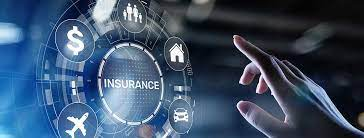

# 1.PROBLEM STATEMENT

The Buisness Objective is to Predict the CHARGES for an Insurance.Charges depend upon number of factors/features as mentioned in Problem.

Since it is a Supervised Machine Learning Problem,We have to Build Prediction Model to Predict the charges for a given Person based on some variables

Here the Trget Variable/Label/dependent column is Charges

Age-age of customer

sex-Gender of customer

bmi-Body mass index 

smoker-whether customer smokes or not

claim_amount-Total claim amount

past_consultaion-past_consulatation in hospital

num_of_step-number of steps persons walk in a day

hospital_expenditure-expenditure have been incurred

number_of_past hospitalization

Annual saalry-annual salary of customer

Region-Region where customer lives

IN THE END****A user can input values and check predicted charges

## 2.IMPORTING DATA AND LIBRARIES

In [1]:
#Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Scikit Libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv(r'C:\Users\esvit\Downloads\Downloads\data science\intellipat\data\insurance.csv')
data.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [3]:
data.shape

(1338, 13)

In [4]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

# 3.EDA

3.1DATA CLEANING

In [6]:
#CHECKNG DUPLICACY
data.duplicated().sum()

0

In [7]:
#hcecking format
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [8]:
#checking null
data.isna().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

Null values have been found

In [9]:
#checking for any wrong value or strange value in every column
col=list(data.columns)
for i in col:
    print(data[i].value_counts())

18.0    69
19.0    66
46.0    29
45.0    29
48.0    29
47.0    29
52.0    29
50.0    29
51.0    29
49.0    28
28.0    28
27.0    28
26.0    28
24.0    28
53.0    28
54.0    28
21.0    28
20.0    28
44.0    27
43.0    27
42.0    27
41.0    27
25.0    27
30.0    27
29.0    27
40.0    27
23.0    27
55.0    26
57.0    26
56.0    26
34.0    26
32.0    26
33.0    26
31.0    26
22.0    26
59.0    25
58.0    25
39.0    25
36.0    25
37.0    25
38.0    25
35.0    24
60.0    23
61.0    23
62.0    23
63.0    23
64.0    22
Name: age, dtype: int64
male      676
female    662
Name: sex, dtype: int64
32.300    13
28.310     9
34.100     8
30.875     8
30.495     8
          ..
29.545     1
44.770     1
36.700     1
21.300     1
47.410     1
Name: bmi, Length: 547, dtype: int64
0.0    574
1.0    321
2.0    240
3.0    156
4.0     25
5.0     17
Name: children, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
29087.543130    1
19540.950640    1
34007.667390    1
34827.574070    1
27682.727

In [10]:
data.describe()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1329.000000,1335.000000,1333.000000,1324.000000,1332.000000,1.335000e+03,1.334000e+03,1336.000000,1.332000e+03,1338.000000
mean,39.310008,30.665112,1.090773,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,13270.422265
std,14.034818,6.101690,1.201856,15617.288337,7.467723,9.188612e+04,2.669305e+07,0.533583,5.668843e+08,12110.011237
min,18.000000,15.960000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,26.302500,0.000000,20768.860390,9.000000,8.471995e+05,4.077633e+06,1.000000,7.701932e+07,4740.287150
50%,39.000000,30.400000,1.000000,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,9382.033000
75%,51.000000,34.687500,2.000000,45052.331957,20.000000,9.716840e+05,1.084082e+07,1.000000,3.243499e+08,16639.912515
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


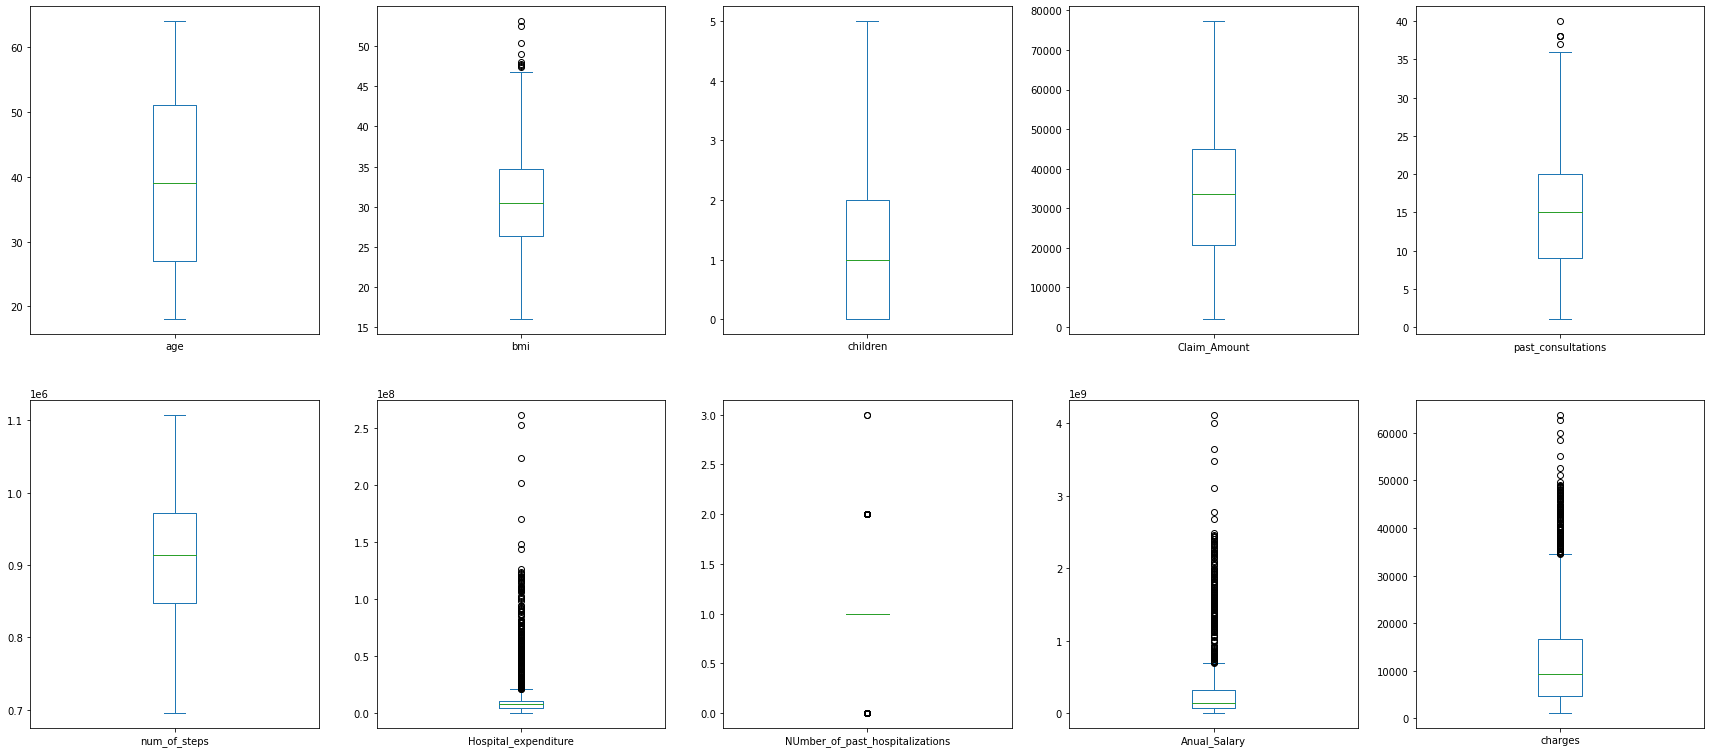

In [11]:
data.plot(kind='box',subplots=True,figsize=(30,35),layout=(5,5))
plt.show()

From the Above Analysis we can now fill our Null Values

In [12]:
data.isna().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [13]:
#Since age column is Normally Distributed we can fill it with mean
data['age'].fillna(data['age'].mean(),inplace=True)

In [14]:
#BMI is almost normally distributed
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

# children with meadian since mean will give floating number
data['children'].fillna(data['children'].median(),inplace=True)

#same
data['Claim_Amount'].fillna(data['Claim_Amount'].mean(),inplace=True)


#same for past_consultations
data['past_consultations'].fillna(data['past_consultations'].mean(),inplace=True)

#num_of steps
data['num_of_steps'].fillna(data['num_of_steps'].mean(),inplace=True)

#since hospital expenditure has Outlier and righly skewed so it has to be filled with median
data['Hospital_expenditure'].fillna(data['Hospital_expenditure'].median(),inplace=True)


#NUmber_of_past_hospitalizations with mean
data['NUmber_of_past_hospitalizations'].fillna(data['NUmber_of_past_hospitalizations'].mean(),inplace=True)

#Anual_Salary with median
data['Anual_Salary'].fillna(data['Anual_Salary'].median(),inplace=True)

In [15]:
#checking 
data.isna().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [16]:
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

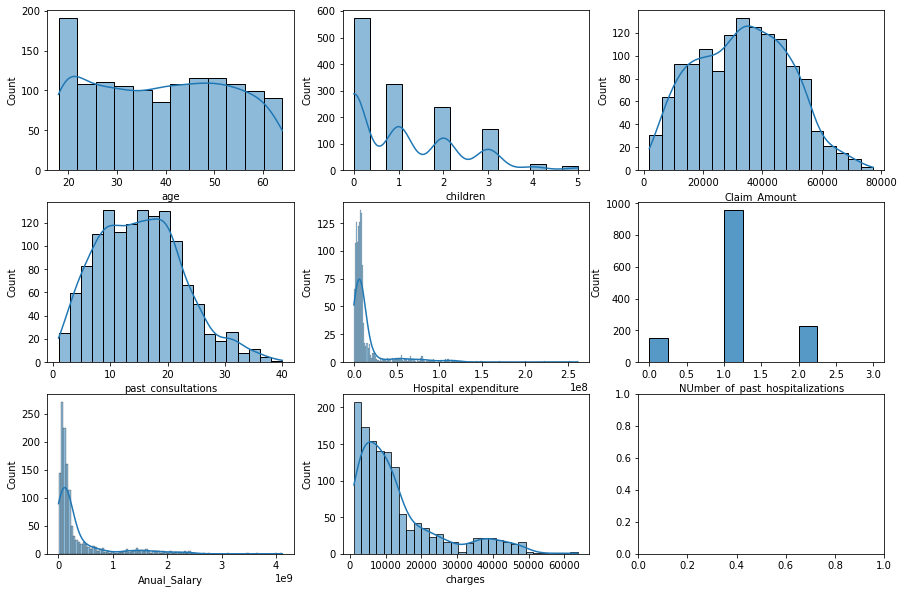

In [17]:
plt.subplots(3,3,figsize=(15,10))
plt.subplot(331)
sns.histplot(data['age'],kde=True)

plt.subplot(332)
sns.histplot(data['children'],kde=True)

plt.subplot(333)
sns.histplot(data['Claim_Amount'],kde=True)

plt.subplot(334)
sns.histplot(data['past_consultations'],kde=True)

plt.subplot(335)
sns.histplot(data['Hospital_expenditure'],kde=True)

plt.subplot(336)
sns.histplot(data['NUmber_of_past_hospitalizations'])

plt.subplot(337)
sns.histplot(data['Anual_Salary'],kde=True)

plt.subplot(338)
sns.histplot(data['charges'],kde=True)

plt.show()


KDE Plot to check Charges amount distrivution with respect to Smokers

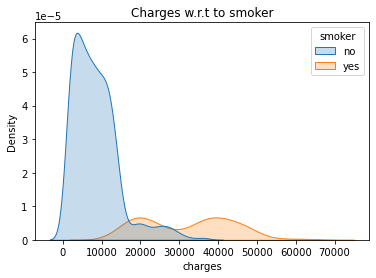

In [18]:
sns.kdeplot(data['charges'],hue=data['smoker'],fill=True)
plt.title('Charges w.r.t to smoker')
plt.show()

From here we can check that number of smoker are less but there charges are higher than non-smokers(0).which is obvious.

In [19]:
data.head(2)

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066


C:\Users\esvit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\esvit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\esvit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\esvit\anacond

<AxesSubplot:xlabel='age', ylabel='charges'>

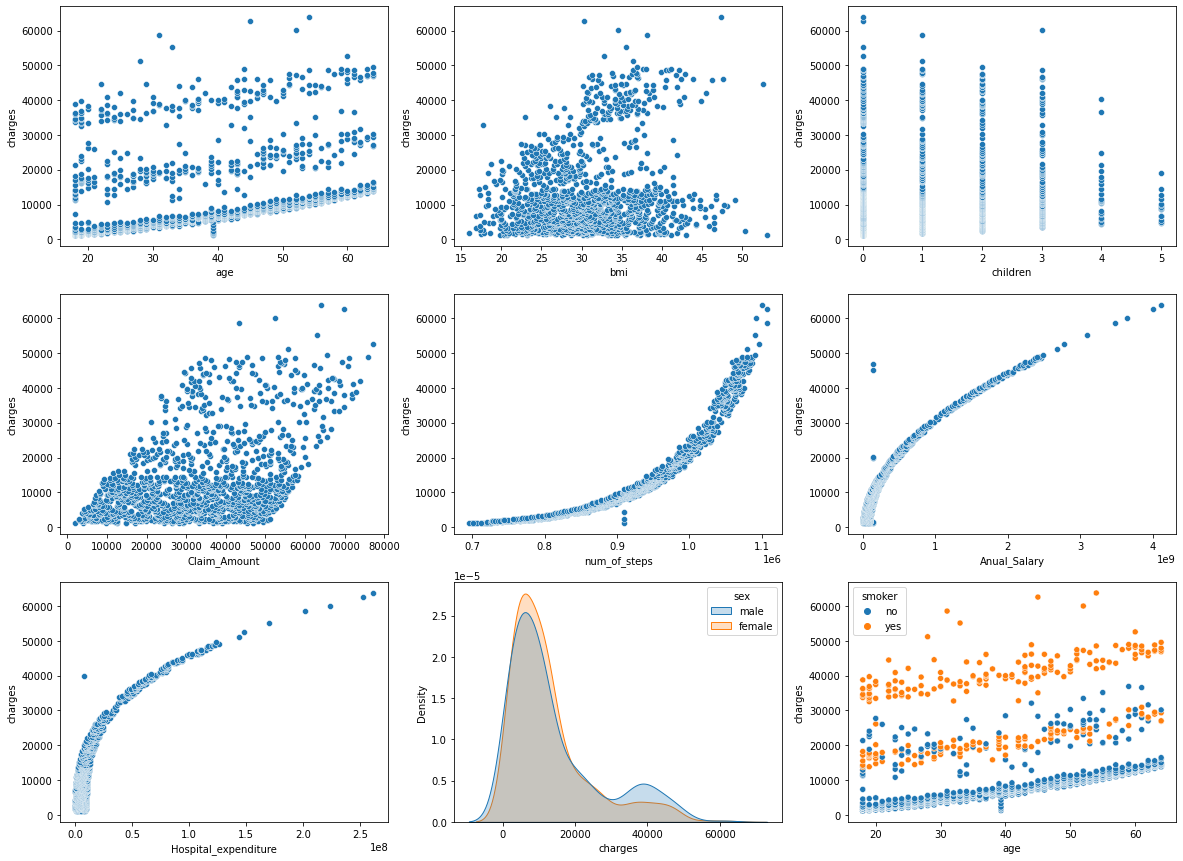

In [20]:

plt.subplots(3,3,figsize=(20,15))
plt.subplot(331)
sns.scatterplot(data['age'],data['charges'])


plt.subplot(332)
sns.scatterplot(data['bmi'],data['charges'])


plt.subplot(333)
sns.scatterplot(data['children'],data['charges'])


plt.subplot(334)
sns.scatterplot(data['Claim_Amount'],data['charges'])



plt.subplot(335)
sns.scatterplot(data['num_of_steps'],data['charges'])


plt.subplot(336)
sns.scatterplot(data['Anual_Salary'],data['charges'])

plt.subplot(337)
sns.scatterplot(data['Hospital_expenditure'],data['charges'])


plt.subplot(338)
sns.kdeplot(data['charges'],hue=data['sex'],fill=True)


plt.subplot(339)
sns.scatterplot(x=data['age'],y=data['charges'],hue=data['smoker'])

# 4.Data Preprocessing

OUTLIER REMOVAL

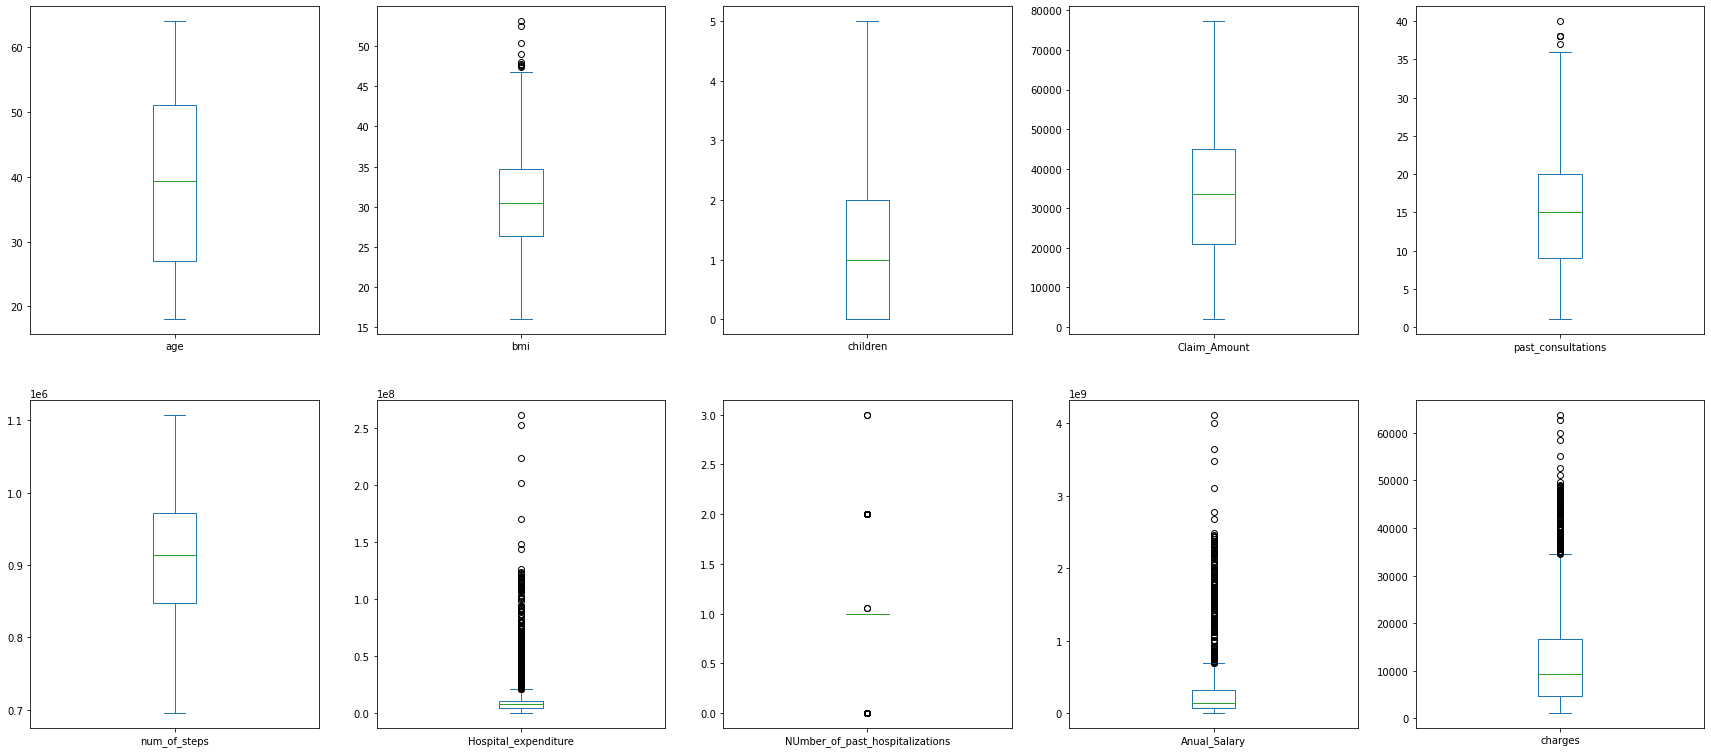

In [21]:
data.plot(kind='box',subplots=True,figsize=(30,35),layout=(5,5))
plt.show()

In [22]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
IQR

age                                2.400000e+01
bmi                                8.341250e+00
children                           2.000000e+00
Claim_Amount                       2.403123e+04
past_consultations                 1.100000e+01
num_of_steps                       1.240202e+05
Hospital_expenditure               6.741357e+06
NUmber_of_past_hospitalizations    0.000000e+00
Anual_Salary                       2.449694e+08
charges                            1.189963e+04
dtype: float64

In [23]:
feature=list(data.columns)

In [24]:
col=[]
for i in feature:
    if data[i].dtypes!='object':
        col.append(i)

In [25]:
col

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'charges']

In [26]:
for i in col:
    Q1=data[i].quantile(0.25)
    Q3=data[i].quantile(0.75)
    IQR=Q3-Q1
    data=data[(data[i]>=Q1-1.5*IQR) & (data[i]<=Q3+1.5*IQR)]

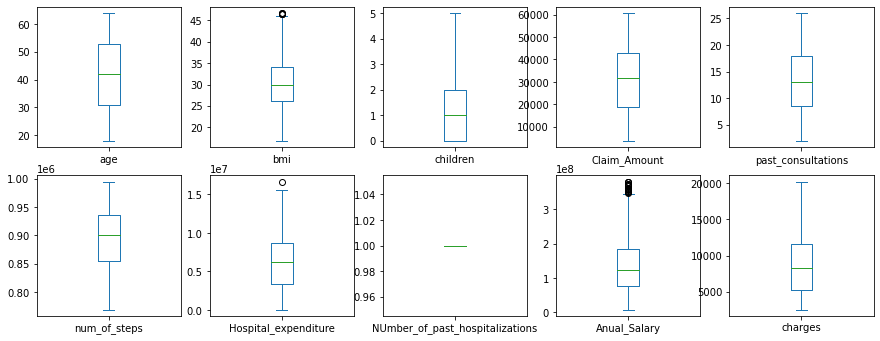

In [27]:
#checking
data.plot(kind='box',subplots=True,layout=(5,5),figsize=(15,15))
plt.show()

In [28]:
data.sample(5)

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
692,52.0,male,33.250,0.0,no,8130.290032,15.0,931543.0,4265125.245,1.0,1.474749e+08,northeast,9722.76950
171,19.0,female,39.615,1.0,no,22209.765420,7.0,798315.0,2210061.828,1.0,1.073871e+07,northwest,2730.10785
525,41.0,male,34.200,2.0,no,34659.981860,12.0,882552.0,1685157.534,1.0,8.404624e+07,northwest,7261.74100
640,47.0,female,29.545,1.0,no,46712.690900,17.0,917642.0,9715568.557,1.0,1.572821e+08,northwest,8930.93455
827,56.0,male,32.110,1.0,no,22846.398000,22.0,941309.0,2618742.146,1.0,2.311307e+08,northeast,11763.00090


Categorical ENCODING FOR COLUMNS 'SEX' AND 'SMOKER'

In [29]:
data=pd.get_dummies(data,columns=['sex','smoker'],drop_first=True)

#Checking whther Region column is significant

<AxesSubplot:xlabel='charges', ylabel='Density'>

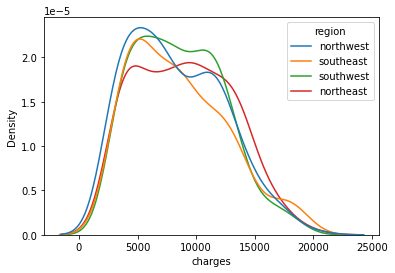

In [30]:
sns.kdeplot(data['charges'],hue=data['region'])

Through this we can check that Chrges are not affected by type of region .Hence Droping Region column

In [31]:
data.drop(['region'],inplace=True,axis=1)

In [32]:
data.head(2)

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges,sex_male,smoker_yes
151,25.0,27.550,0.0,39148.95495,10.0,780652.0,8.614147e+06,1.0,54526009.33,2523.16950,1,0
152,22.0,20.235,0.0,41547.52536,13.0,802627.0,2.491594e+05,1.0,16718473.13,2527.81865,0,0


# 5.Model Buidling

In [33]:
data.shape

(879, 12)

In [34]:
data.head(2)

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges,sex_male,smoker_yes
151,25.0,27.550,0.0,39148.95495,10.0,780652.0,8.614147e+06,1.0,54526009.33,2523.16950,1,0
152,22.0,20.235,0.0,41547.52536,13.0,802627.0,2.491594e+05,1.0,16718473.13,2527.81865,0,0


In [35]:
feature=data.iloc[:,[0,1,2,3,4,5,6,7,8,10,11]]
feature

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,sex_male,smoker_yes
151,25.0,27.550,0.0,39148.95495,10.0,780652.0,8.614147e+06,1.0,5.452601e+07,1,0
152,22.0,20.235,0.0,41547.52536,13.0,802627.0,2.491594e+05,1.0,1.671847e+07,0,0
153,25.0,35.625,0.0,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07,1,0
154,20.0,31.130,2.0,16032.87148,7.0,769255.0,1.599069e+06,1.0,2.441262e+07,1,0
155,21.0,17.400,1.0,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1041,24.0,27.600,0.0,27184.27803,9.0,980010.0,1.266673e+07,1.0,3.743228e+08,0,0
1046,29.0,27.940,1.0,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,0,1
1050,31.0,29.810,0.0,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08,1,1
1062,43.0,20.045,2.0,21596.43846,10.0,994419.0,1.083030e+07,1.0,1.419361e+08,0,1


In [36]:
data['charges']

151      2523.16950
152      2527.81865
153      2534.39375
154      2566.47070
155      2585.26900
           ...     
1041    18955.22017
1046    19107.77960
1050    19350.36890
1062    19798.05455
1069    20234.85475
Name: charges, Length: 879, dtype: float64

In [37]:
data.sample(10)

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges,sex_male,smoker_yes
977,20.0,22.420,0.0,56868.95972,22.0,976741.0,1.318115e+07,1.0,2.999947e+08,14711.74380,0,1
287,27.0,30.300,3.0,30545.82014,17.0,849404.0,4.975613e+05,1.0,1.014772e+08,4260.74400,1,0
373,35.0,31.000,1.0,47511.14927,15.0,840737.0,6.969061e+06,1.0,4.423883e+07,5240.76500,0,0
1041,24.0,27.600,0.0,27184.27803,9.0,980010.0,1.266673e+07,1.0,3.743228e+08,18955.22017,0,0
908,60.0,24.320,1.0,32559.21065,9.0,935446.0,1.193068e+07,1.0,2.610378e+08,13112.60480,1,0
841,58.0,30.305,0.0,31405.79359,12.0,939497.0,9.380141e+06,1.0,2.118739e+08,11938.25595,1,0
178,19.0,20.615,2.0,45982.45593,14.0,795136.0,5.764709e+04,1.0,9.731782e+07,2803.69785,1,0
479,33.0,33.440,5.0,41495.24157,10.0,890208.0,2.395061e+06,1.0,1.055793e+08,6653.78860,1,0
458,40.0,29.355,1.0,24614.31198,10.0,881505.0,6.775857e+06,1.0,4.088506e+07,6393.60345,1,0
333,28.0,23.845,2.0,37934.04511,17.0,859196.0,1.078261e+06,1.0,5.656139e+07,4719.73655,0,0


In [38]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 151 to 1069
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              879 non-null    float64
 1   bmi                              879 non-null    float64
 2   children                         879 non-null    float64
 3   Claim_Amount                     879 non-null    float64
 4   past_consultations               879 non-null    float64
 5   num_of_steps                     879 non-null    float64
 6   Hospital_expenditure             879 non-null    float64
 7   NUmber_of_past_hospitalizations  879 non-null    float64
 8   Anual_Salary                     879 non-null    float64
 9   sex_male                         879 non-null    uint8  
 10  smoker_yes                       879 non-null    uint8  
dtypes: float64(9), uint8(2)
memory usage: 70.4 KB


In [39]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
feature['sex_male']=feature['sex_male'].astype('float64')
feature['smoker_yes']=feature['smoker_yes'].astype('float64')

In [41]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 151 to 1069
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              879 non-null    float64
 1   bmi                              879 non-null    float64
 2   children                         879 non-null    float64
 3   Claim_Amount                     879 non-null    float64
 4   past_consultations               879 non-null    float64
 5   num_of_steps                     879 non-null    float64
 6   Hospital_expenditure             879 non-null    float64
 7   NUmber_of_past_hospitalizations  879 non-null    float64
 8   Anual_Salary                     879 non-null    float64
 9   sex_male                         879 non-null    float64
 10  smoker_yes                       879 non-null    float64
dtypes: float64(11)
memory usage: 82.4 KB


Splitting Data to train test 

In [42]:
x_train,x_test,y_train,y_test=train_test_split(feature,data['charges'],test_size=0.2,random_state=0)
x_train.shape,x_test.shape,y_test.shape,y_train.shape

((703, 11), (176, 11), (176,), (703,))

In [43]:
lr=LinearRegression()


In [44]:
lr.fit(x_train,y_train)

LinearRegression()

In [45]:
lr.intercept_

-38154.877167325

In [46]:
lr.coef_

array([ 1.68456457e+01, -3.12119824e+00, -8.38732983e+00, -3.19864446e-05,
        5.15821785e+00,  4.90233707e-02,  1.65182154e-05, -1.47792889e-12,
        1.54068905e-05, -1.04188125e+02,  1.77393211e+03])

In [47]:
y_predict=lr.predict(x_test)

# 6.Model Evaluation

In [48]:
print('r2_score of model is  ',r2_score(y_test,y_predict))

r2_score of model is   0.9616130694569553


In [49]:
print('mean_absolute_error  ',mean_absolute_error(y_test,y_predict))

mean_absolute_error   584.950546830253


In [50]:
print('mean_squared_error  ',mean_squared_error(y_test,y_predict))

mean_squared_error   639997.5663719695


In [51]:
y_predict

array([ 6843.37418822, 12114.54569594, 11172.7541815 ,  5370.96634581,
        7022.76228436, 11925.13832974, 11243.2835677 , 12366.81712621,
       10470.11516732,  5725.92086958, 13258.85205393,  5994.70820353,
        5497.3437078 ,  3648.88514354, 13773.94312019,  2321.33128506,
        3795.67890377, 10911.443192  ,  8345.94223311,  3001.07526538,
       12286.29246134, 15319.10393453, 12348.10816093,  8807.9831888 ,
        4317.22245552,  5784.09739109, 15176.59978503,  8290.88815854,
       17640.85722998,  5825.6880873 ,  7143.19978888, 11337.07150767,
        4911.40789631,  9874.4369812 ,  5067.79212356, 12806.39623747,
        6840.64877253,  6392.6979336 , 15775.59325181, 11867.49871999,
        8868.77924257,  2862.81232423, 10816.75129083,  5681.13005718,
        8034.6227611 ,  7700.25897062, 11016.19308412, 14935.19787581,
        6137.21462933,  6630.05144586, 13703.83908262,  2369.10284818,
        3285.27540125,  8667.38309008, 17736.94705859,  2526.92336096,
      

In [52]:
lr.score(x_train,y_train)

0.9618989154425968

In [53]:
lr.intercept_

-38154.877167325

In [54]:
lr.coef_

array([ 1.68456457e+01, -3.12119824e+00, -8.38732983e+00, -3.19864446e-05,
        5.15821785e+00,  4.90233707e-02,  1.65182154e-05, -1.47792889e-12,
        1.54068905e-05, -1.04188125e+02,  1.77393211e+03])

In [55]:
data.head(1)

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges,sex_male,smoker_yes
151,25.0,27.55,0.0,39148.95495,10.0,780652.0,8614147.467,1.0,54526009.33,2523.1695,1,0


Creating a fucntion where user can input values and find the predicted value

In [77]:
def Prediction():
    age=int(input())
    bmi=float(input())
    children=int(input())
    Claim_amount=float(input())
    past_consultation=int(input())
    number_steps=int(input())
    Hospital_exp=int(input())
    past_hospitilization=int(input())
    Annual_salary=int(input())
    
    sex=str(input())
    if sex=='m':
        sex=1
    elif sex=='f':
        sex=0
    else:
        print('please enter correct gender')
   
    smoker=str(input())
    if smoker=='yes':
        smoker=1
    elif smoker=='no':
        smoker=0
    else:
        print('please enter correct input')
        
    
    array=np.array([age,bmi,children,Claim_amount,past_consultation,number_steps,Hospital_exp,past_hospitilization,Annual_salary,sex,smoker]).reshape(1,11)
    predicted_charge=lr.predict(array)
    print(predicted_charge)

Lets check for row number 438

In [78]:
Prediction()

34
29.260
3
28578.499090
18
886628
8616323
1
6663892
f
no
[6103.80954421]


A user can input values and check predicted charges